# 🏠 House Price Prediction using Linear Regression

**Author:** Aqib Ahmed

## 📌 Description
This project uses a **Linear Regression** model to predict house prices based on the following features:
- **Square footage** (`GrLivArea`)
- **Number of bedrooms** (`BedroomAbvGr`)
- **Number of bathrooms** (`FullBath`)

## 📂 Dataset
**Name:** *House Prices - Advanced Regression Techniques*
**Source:** [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
data = pd.read_csv("train.csv")

## 3. Feature Selection

- **GrLivArea**     (`Ground living area (square feet)`)
- **BedroomAbvGr**  (`Bedrooms above ground`)
- **FullBath**      (`Full bathrooms above ground`)
- **SalePrice**     (`Target variable (house price)`)

In [17]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

### Remove rows with missing values in selected columns

In [18]:
data = data.dropna(subset=features + [target])

In [19]:
X = data[features]
y = data[target]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

## Model Evaluation

In [23]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation")
print("---------------------------")
print(f"Intercept: {model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


📊 Model Evaluation
---------------------------
Intercept: 52261.75
Coefficients:
  GrLivArea: 104.03
  BedroomAbvGr: -26655.17
  FullBath: 30014.32
RMSE: 52975.72
R² Score: 0.634


## 📊 Visualization: Actual vs Predicted

Text(0.5, 1.0, 'Actual vs Predicted House Prices')

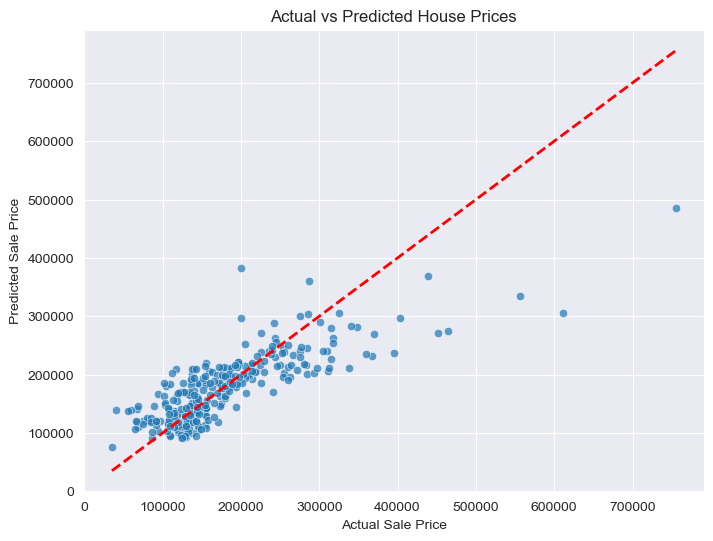

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")

## 📊 Visualization: Residual Plot

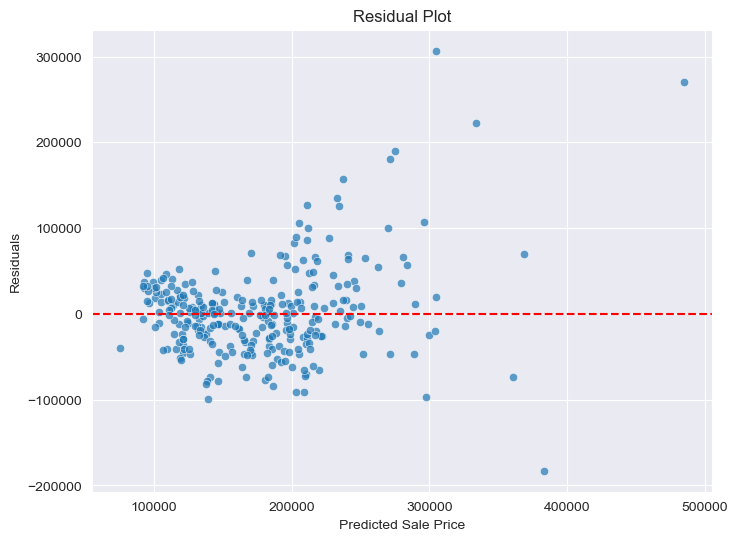

In [25]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## Example Prediction

In [26]:
example_house = pd.DataFrame({
    'GrLivArea': [2000],   # sqft
    'BedroomAbvGr': [3],   # bedrooms
    'FullBath': [2]        # bathrooms
})
predicted_price = model.predict(example_house)[0]
print(f"\n💡 Predicted Price for Example House: ${predicted_price:,.2f}")


💡 Predicted Price for Example House: $240,377.51
